<a href="https://colab.research.google.com/github/TVLlam/1771020412_CNTT17-01_TRAN_VAN_LAM/blob/master/BTL_XSTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dữ liệu ban đầu:
   Diện_Tích_Sàn  Số_Phòng_Ngủ  Số_Phòng_Tắm  Năm_Xây_Dựng  Diện_Tích_Đất  \
0           1360             2             1          1981       0.599637   
1           4272             3             3          2016       4.753014   
2           3592             1             2          2016       3.634823   
3            966             1             2          1977       2.730667   
4           4926             2             1          1993       4.699073   

   Số_Chỗ_Đậu_Xe  Chất_Lượng_Khu_Vực       Giá_Nhà  
0              0                   5  2.623829e+05  
1              1                   6  9.852609e+05  
2              0                   9  7.779774e+05  
3              1                   8  2.296989e+05  
4              0                   8  1.041741e+06  

Các giá trị thiếu trong dữ liệu:
Diện_Tích_Sàn         0
Số_Phòng_Ngủ          0
Số_Phòng_Tắm          0
Năm_Xây_Dựng          0
Diện_Tích_Đất         0
Số_Chỗ_Đậu_Xe         0
Chất_Lượng_Khu_Vực    0


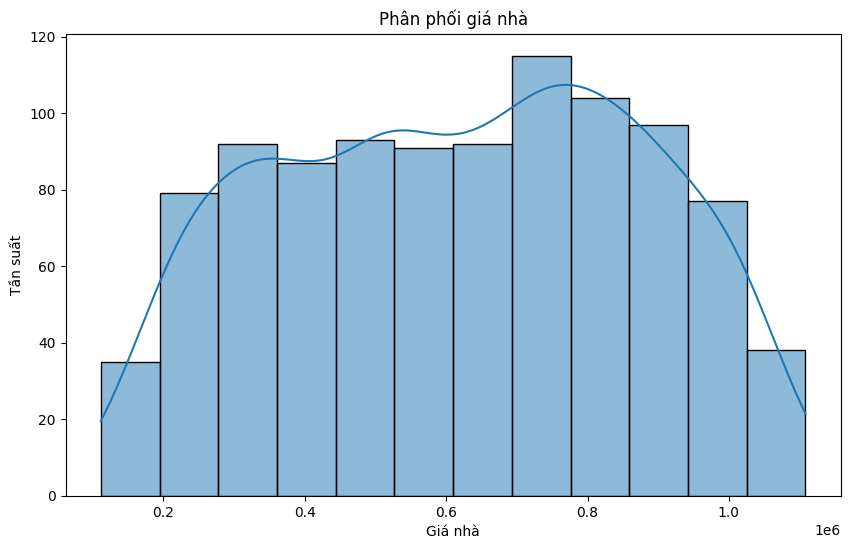

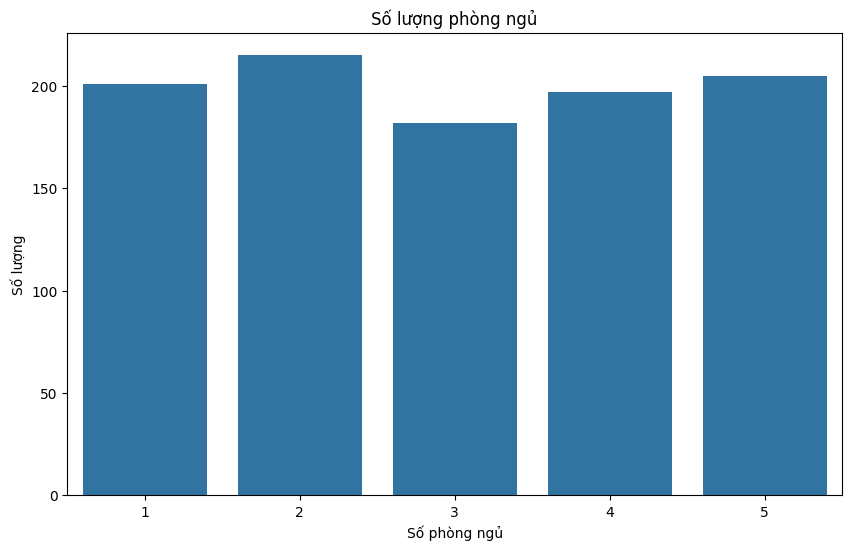

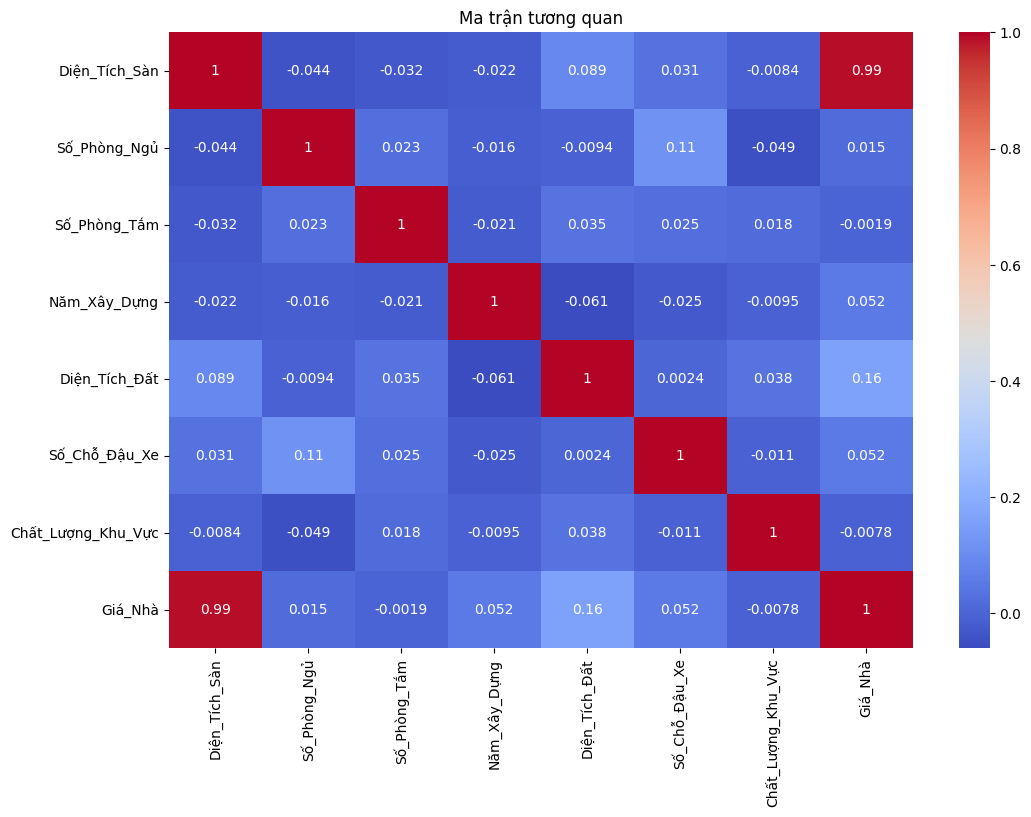


Mô hình hồi quy tuyến tính:
y = 618884.8026 + (250366.5788 * x1) + (14589.8296 * x2) + (6730.2708 * x3) + (20489.3165 * x4) + (19310.1250 * x5) + (4191.8719 * x6) + (332.0437 * x7)

Kết quả dự đoán của mô hình hồi quy tuyến tính:
    Giá thực tế   Giá dự đoán
0  9.010005e+05  8.686871e+05
1  4.945375e+05  4.903379e+05
2  9.494042e+05  9.456671e+05
3  1.040389e+06  1.033403e+06
4  7.940100e+05  7.766988e+05
5  7.240336e+05  7.324441e+05
6  9.984392e+05  9.950520e+05
7  9.097134e+05  8.851748e+05
8  7.926815e+05  7.967305e+05
9  9.474908e+05  9.317411e+05

Đánh giá mô hình hồi quy tuyến tính:
Mean Squared Error (MSE): 101434798.5211
R-squared: 0.9984

Đánh giá mô hình Random Forest:
Mean Squared Error (MSE): 397913588.7798
R-squared: 0.9938

Mức độ quan trọng của từng biến trong Random Forest:
Diện_Tích_Sàn: 0.9861
Năm_Xây_Dựng: 0.0054
Diện_Tích_Đất: 0.0052
Số_Phòng_Ngủ: 0.0017
Chất_Lượng_Khu_Vực: 0.0007
Số_Phòng_Tắm: 0.0005
Số_Chỗ_Đậu_Xe: 0.0004

So sánh kết quả giữa hai mô hình:
Hồi q

In [4]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Bước 1: Thu thập dữ liệu
# Đọc file dữ liệu
file_path = '/content/drive/MyDrive/XSTT/DL_VN.csv'
data = pd.read_csv(file_path)

# Bước 2: Làm sạch dữ liệu
# In ra file dữ liệu ban đầu
print("Dữ liệu ban đầu:")
print(data.head())

# Kiểm tra các giá trị thiếu
print("\nCác giá trị thiếu trong dữ liệu:")
print(data.isnull().sum())

# Xử lý các giá trị thiếu (ví dụ: điền bằng giá trị trung bình)
data.fillna(data.mean(), inplace=True)

# Kiểm tra các giá trị lỗi (ví dụ: giá trị âm không hợp lệ)
print("\nCác giá trị lỗi trong dữ liệu:")
print(data[(data < 0).any(axis=1)])

# Xử lý các giá trị lỗi (ví dụ: thay thế bằng giá trị trung bình)
data[data < 0] = np.nan
data.fillna(data.mean(), inplace=True)

# In ra bộ dữ liệu mới sau khi đã làm sạch
print("\nDữ liệu sau khi làm sạch:")
print(data.head())

# Bước 3: EDA (Exploratory Data Analysis)
# In ra các chỉ số thống kê cơ bản
print("\nCác chỉ số thống kê cơ bản:")
print(data.describe())

# In ra các chỉ số thống kê cho từng biến
for column in data.columns:
    print(f"\nThống kê cho biến {column}:")
    print(data[column].describe())

# Vẽ biểu đồ phân phối của giá nhà
plt.figure(figsize=(10, 6))
sns.histplot(data['Giá_Nhà'], kde=True)
plt.title('Phân phối giá nhà')
plt.xlabel('Giá nhà')
plt.ylabel('Tần suất')
plt.show()

# Vẽ biểu đồ cột cho số phòng ngủ
plt.figure(figsize=(10, 6))
sns.countplot(x='Số_Phòng_Ngủ', data=data)
plt.title('Số lượng phòng ngủ')
plt.xlabel('Số phòng ngủ')
plt.ylabel('Số lượng')
plt.show()

# Vẽ biểu đồ tương quan giữa các biến
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

# Bước 4: Xây dựng mô hình

## 4.1 Chuẩn bị dữ liệu
### Xác định biến độc lập và biến phụ thuộc
# y: Biến phụ thuộc (biến cần dự đoán - Giá nhà)
# X: Biến độc lập (các yếu tố ảnh hưởng đến giá nhà)
X = data.drop('Giá_Nhà', axis=1)
y = data['Giá_Nhà']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 4.2 Xây dựng mô hình hồi quy tuyến tính
### Phương trình hồi quy tuyến tính:
### y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε
### - β₀: Hệ số chặn (giá trị của y khi tất cả các biến độc lập bằng 0).
### - β₁, β₂, ..., βₙ: Các hệ số hồi quy (mức độ ảnh hưởng của từng biến độc lập lên biến phụ thuộc).
### - ε: Sai số ngẫu nhiên.

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Hệ số hồi quy
beta_0 = model.intercept_
beta_values = model.coef_

print("\nMô hình hồi quy tuyến tính:")
print(f"y = {beta_0:.4f} + " + " + ".join([f"({beta:.4f} * x{i+1})" for i, beta in enumerate(beta_values)]))

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# In kết quả dự đoán so với thực tế
print("\nKết quả dự đoán của mô hình hồi quy tuyến tính:")
comparison_df = pd.DataFrame({'Giá thực tế': y_test.values, 'Giá dự đoán': y_pred})
print(comparison_df.head(10))

# Đánh giá mô hình hồi quy tuyến tính
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nĐánh giá mô hình hồi quy tuyến tính:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

## 4.3 Xây dựng mô hình Random Forest
### Mô hình Random Forest là một thuật toán học máy ensemble sử dụng nhiều cây quyết định.
### Nó có thể giúp cải thiện độ chính xác bằng cách giảm phương sai.

# Xây dựng mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nĐánh giá mô hình Random Forest:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")

## 4.4 Phân tích mức độ quan trọng của từng biến trong Random Forest
feature_importance = rf_model.feature_importances_
feature_names = X.columns

print("\nMức độ quan trọng của từng biến trong Random Forest:")
for name, importance in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{name}: {importance:.4f}")

## 4.5 So sánh và đánh giá mô hình
print("\nSo sánh kết quả giữa hai mô hình:")
print(f"Hồi quy tuyến tính - MSE: {mse:.4f}, R-squared: {r2:.4f}")
print(f"Random Forest - MSE: {mse_rf:.4f}, R-squared: {r2_rf:.4f}")

if r2_rf > r2:
    print("Mô hình Random Forest có hiệu suất tốt hơn mô hình hồi quy tuyến tính.")
else:
    print("Mô hình hồi quy tuyến tính có hiệu suất tốt hơn hoặc tương đương Random Forest.")

print("\nKết luận:")
print("- Hồi quy tuyến tính giúp giải thích rõ ràng mối quan hệ giữa các biến nhưng có thể không đủ mạnh để nắm bắt các mô hình phức tạp.")
print("- Random Forest thường có độ chính xác cao hơn do khả năng học từ dữ liệu phi tuyến tính nhưng khó giải thích hơn.")
print("- Lựa chọn mô hình phụ thuộc vào mục tiêu cụ thể của bài toán.")


# Bước 5: Phân tích kết quả
# Tóm tắt kết quả
if r2 > 0.7:
    print("Mô hình dự đoán tốt.")
else:
    print("Mô hình cần cải thiện.")

# Đề xuất các cách cải thiện
print("\nĐề xuất cải thiện:")
print("1. Thử nghiệm các thuật toán khác như Random Forest, Gradient Boosting.")
print("2. Thu thập thêm dữ liệu để cải thiện độ chính xác.")
print("3. Xử lý tốt hơn các biến đầu vào, loại bỏ các biến không cần thiết.")

Dữ liệu ban đầu:
   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  

Các giá trị thiếu trong dữ liệu:
Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price     

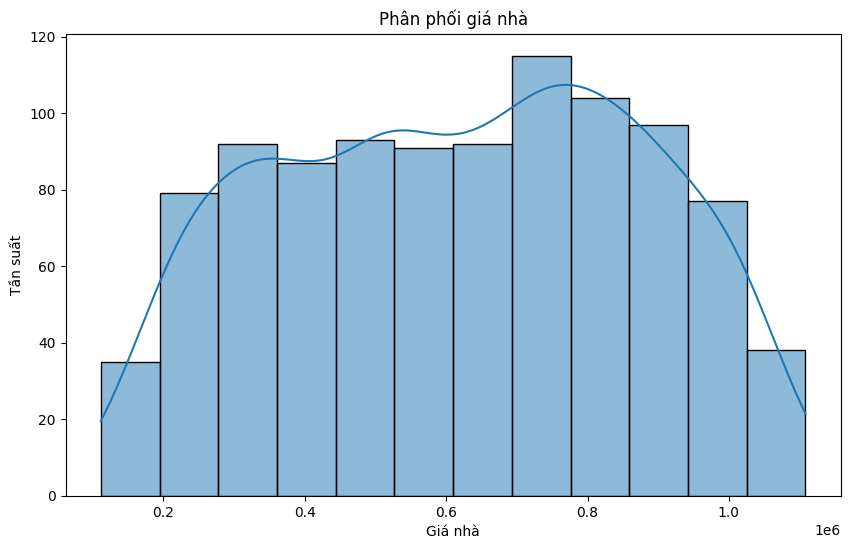

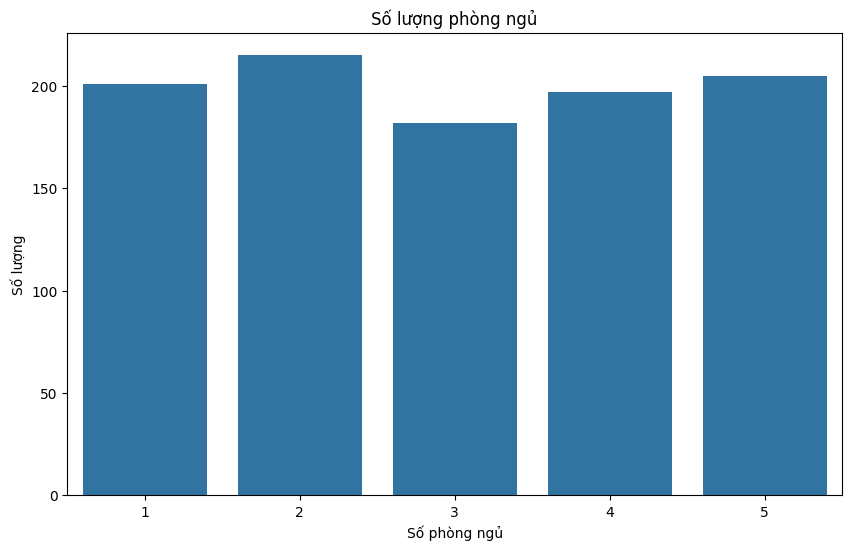

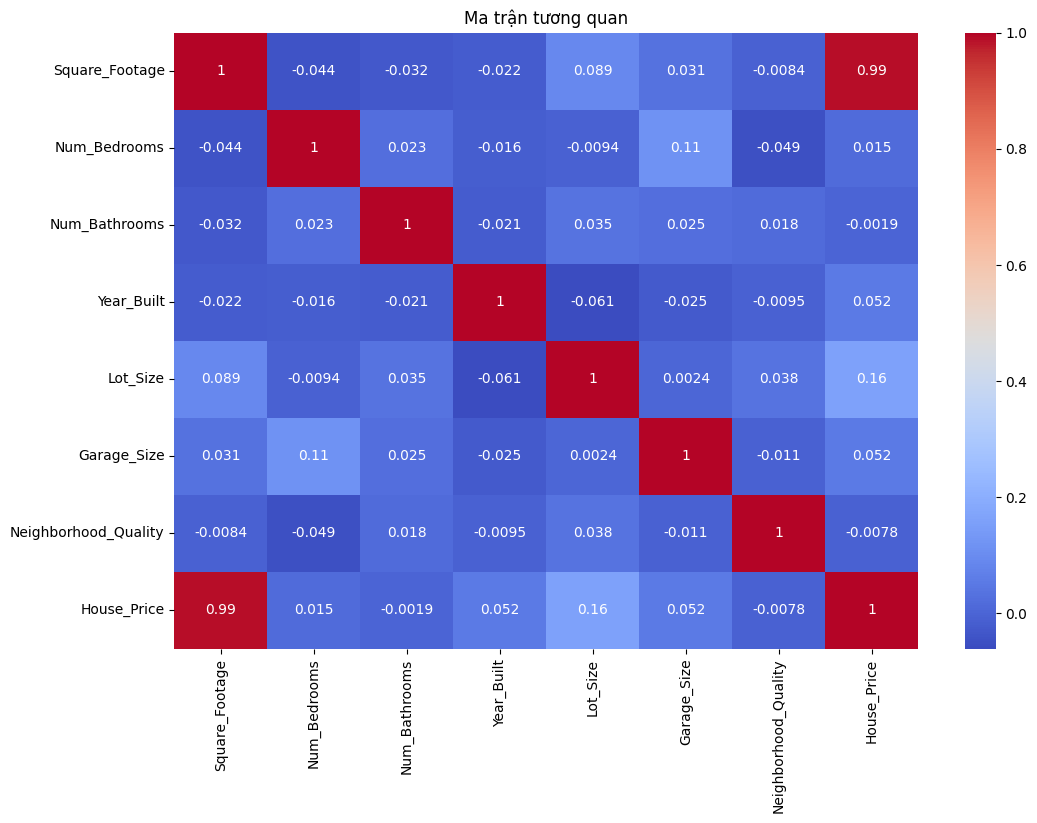


Mô hình hồi quy tuyến tính:
y = 618884.8026 + (250366.5788 * x1) + (14589.8296 * x2) + (6730.2708 * x3) + (20489.3165 * x4) + (19310.1250 * x5) + (4191.8719 * x6) + (332.0437 * x7)

Kết quả dự đoán của mô hình hồi quy tuyến tính:
    Giá thực tế   Giá dự đoán
0  9.010005e+05  8.686871e+05
1  4.945375e+05  4.903379e+05
2  9.494042e+05  9.456671e+05
3  1.040389e+06  1.033403e+06
4  7.940100e+05  7.766988e+05
5  7.240336e+05  7.324441e+05
6  9.984392e+05  9.950520e+05
7  9.097134e+05  8.851748e+05
8  7.926815e+05  7.967305e+05
9  9.474908e+05  9.317411e+05

Đánh giá mô hình hồi quy tuyến tính:
Mean Squared Error (MSE): 101434798.5056
R-squared: 0.9984

Đánh giá mô hình Random Forest:
Mean Squared Error (MSE): 396690279.2756
R-squared: 0.9938

Mức độ quan trọng của từng biến trong Random Forest:
Square_Footage: 0.9861
Year_Built: 0.0054
Lot_Size: 0.0051
Num_Bedrooms: 0.0017
Neighborhood_Quality: 0.0007
Num_Bathrooms: 0.0005
Garage_Size: 0.0004

So sánh kết quả giữa hai mô hình:
Hồi quy tu

In [3]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Bước 1: Thu thập dữ liệu
# Đọc file dữ liệu
file_path = '/content/drive/MyDrive/XSTT/house_price_regression_dataset.csv'
data = pd.read_csv(file_path)

# Bước 2: Làm sạch dữ liệu
# In ra file dữ liệu ban đầu
print("Dữ liệu ban đầu:")
print(data.head())

# Kiểm tra các giá trị thiếu
print("\nCác giá trị thiếu trong dữ liệu:")
print(data.isnull().sum())

# Xử lý các giá trị thiếu (ví dụ: điền bằng giá trị trung bình)
data.fillna(data.mean(), inplace=True)

# Kiểm tra các giá trị lỗi (ví dụ: giá trị âm không hợp lệ)
print("\nCác giá trị lỗi trong dữ liệu:")
print(data[(data < 0).any(axis=1)])

# Xử lý các giá trị lỗi (ví dụ: thay thế bằng giá trị trung bình)
data[data < 0] = np.nan
data.fillna(data.mean(), inplace=True)

# In ra bộ dữ liệu mới sau khi đã làm sạch
print("\nDữ liệu sau khi làm sạch:")
print(data.head())

# Bước 3: EDA (Exploratory Data Analysis)
# In ra các chỉ số thống kê cơ bản
print("\nCác chỉ số thống kê cơ bản:")
print(data.describe())

# In ra các chỉ số thống kê cho từng biến
for column in data.columns:
    print(f"\nThống kê cho biến {column}:")
    print(data[column].describe())

# Vẽ biểu đồ phân phối của giá nhà
plt.figure(figsize=(10, 6))
sns.histplot(data['House_Price'], kde=True)
plt.title('Phân phối giá nhà')
plt.xlabel('Giá nhà')
plt.ylabel('Tần suất')
plt.show()

# Vẽ biểu đồ cột cho số phòng ngủ
plt.figure(figsize=(10, 6))
sns.countplot(x='Num_Bedrooms', data=data)
plt.title('Số lượng phòng ngủ')
plt.xlabel('Số phòng ngủ')
plt.ylabel('Số lượng')
plt.show()

# Vẽ biểu đồ tương quan giữa các biến
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

# Bước 4: Xây dựng mô hình

## 4.1 Chuẩn bị dữ liệu
### Xác định biến độc lập và biến phụ thuộc
# y: Biến phụ thuộc (biến cần dự đoán - Giá nhà)
# X: Biến độc lập (các yếu tố ảnh hưởng đến giá nhà)
X = data.drop('House_Price', axis=1)
y = data['House_Price']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 4.2 Xây dựng mô hình hồi quy tuyến tính
### Phương trình hồi quy tuyến tính:
### y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε
### - β₀: Hệ số chặn (giá trị của y khi tất cả các biến độc lập bằng 0).
### - β₁, β₂, ..., βₙ: Các hệ số hồi quy (mức độ ảnh hưởng của từng biến độc lập lên biến phụ thuộc).
### - ε: Sai số ngẫu nhiên.

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Hệ số hồi quy
beta_0 = model.intercept_
beta_values = model.coef_

print("\nMô hình hồi quy tuyến tính:")
print(f"y = {beta_0:.4f} + " + " + ".join([f"({beta:.4f} * x{i+1})" for i, beta in enumerate(beta_values)]))

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# In kết quả dự đoán so với thực tế
print("\nKết quả dự đoán của mô hình hồi quy tuyến tính:")
comparison_df = pd.DataFrame({'Giá thực tế': y_test.values, 'Giá dự đoán': y_pred})
print(comparison_df.head(10))

# Đánh giá mô hình hồi quy tuyến tính
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nĐánh giá mô hình hồi quy tuyến tính:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

## 4.3 Xây dựng mô hình Random Forest
### Mô hình Random Forest là một thuật toán học máy ensemble sử dụng nhiều cây quyết định.
### Giúp cải thiện độ chính xác bằng cách giảm phương sai.

# Xây dựng mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nĐánh giá mô hình Random Forest:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")

## 4.4 Phân tích mức độ quan trọng của từng biến trong Random Forest
feature_importance = rf_model.feature_importances_
feature_names = X.columns

print("\nMức độ quan trọng của từng biến trong Random Forest:")
for name, importance in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{name}: {importance:.4f}")

## 4.5 So sánh và đánh giá mô hình
print("\nSo sánh kết quả giữa hai mô hình:")
print(f"Hồi quy tuyến tính - MSE: {mse:.4f}, R-squared: {r2:.4f}")
print(f"Random Forest - MSE: {mse_rf:.4f}, R-squared: {r2_rf:.4f}")

if r2_rf > r2:
    print("Mô hình Random Forest có hiệu suất tốt hơn mô hình hồi quy tuyến tính.")
else:
    print("Mô hình hồi quy tuyến tính có hiệu suất tốt hơn hoặc tương đương Random Forest.")

print("\nKết luận:")
print("- Hồi quy tuyến tính giúp giải thích rõ ràng mối quan hệ giữa các biến nhưng có thể không đủ mạnh để nắm bắt các mô hình phức tạp.")
print("- Random Forest thường có độ chính xác cao hơn do khả năng học từ dữ liệu phi tuyến tính nhưng khó giải thích hơn.")
print("- Lựa chọn mô hình phụ thuộc vào mục tiêu cụ thể của bài toán.")

# Bước 5: Phân tích kết quả
# Tóm tắt kết quả
if r2 > 0.7:
    print("Mô hình dự đoán tốt.")
else:
    print("Mô hình cần cải thiện.")

# Đề xuất các cách cải thiện
print("\nĐề xuất cải thiện:")
print("1. Thử nghiệm các thuật toán khác như Random Forest, Gradient Boosting.")
print("2. Thu thập thêm dữ liệu để cải thiện độ chính xác.")
print("3. Xử lý tốt hơn các biến đầu vào, loại bỏ các biến không cần thiết.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
